In [1]:
from sympy import *
from IPython.display import display, Math
import numpy as np
x, t, z, nu = symbols('x t z nu')
init_printing(use_unicode=True)


In [2]:
x, y = symbols('x y')
expr = x + 2*y
expr


In [3]:
y = Function('y')
eq = Eq(y(t).diff(t, t) - y(t), exp(t))
dsolve(eq, y(t))


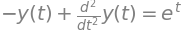

In [4]:
eq


In [5]:
σ = Function('ч')
dsolve(Eq(σ(t).diff(t, t) - σ(t), exp(t)), σ(t))


In [6]:
from sympy import Symbol, nsolve


In [151]:
from sympy import solve
x, y, sigma, mu, delta, alpha, beta, ro, eta, b, lambd = symbols(
    'x y σ μ δ α β ρ η b λ')
sigma_c = 0.1181
ro_c = 1.31
eta_c = 20.19
alpha_c = 1.636
beta_c = 0.002
delta_c = 0.3743
mu_c = 0.005
b_c = 0

dxdt = sigma + ro*x*y/(eta + y) - mu*x*y - delta*x
dydt = alpha*y*(1-beta*y)-x*y-(b*y)/(1+y)

concrete_params = {ro: ro_c, sigma: sigma_c, eta: eta_c, b: b_c,
                   alpha: alpha_c, beta: beta_c, mu: mu_c, delta: delta_c}
muless_params = dict(concrete_params)
del muless_params[mu]


In [237]:
display(Math('\dfrac{dx}{dt} = ' + latex(dxdt)))
display(Math('\dfrac{dy}{dt} = ' + latex(dydt)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Точки равновесия

### 1

In [268]:
display(Math('x = ' + latex(sigma/delta)))
display(Math('y = 0' )) # Решение не зависит от μ

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [284]:
def get_solutions(cur_mu=concrete_params[mu]):
    params = dict(concrete_params)
    params[mu] = cur_mu
    return solve([dxdt.subs(params), dydt.subs(params)], x,y)

In [340]:
def display_solutions(sols):
    for s in sols:
        display(s)

In [286]:
solutions = get_solutions()

In [288]:
for s in solutions:
    display(s)

### Матрица первого приближения

#### Частные производные

In [209]:
dfdx = diff(dxdt, x)
dfdy = diff(dxdt, y)
dgdx = diff(dydt, x)
dgdy = diff(dydt, y)


In [275]:
display(Math('\dfrac{df}{dx} = ' + latex(dfdx)))
display(Math('\dfrac{df}{dy} = ' + latex(dfdy)))
display(Math('\dfrac{dg}{dx} = ' + latex(dgdx)))
display(Math('\dfrac{dg}{dy} = ' + latex(dfdy)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Частные производные в точке равновесия

In [276]:
a11 = dfdx.evalf(subs={**eqilibrium, **muless_params})
a12 = dfdy.evalf(subs={**eqilibrium, **muless_params})
a21 = dgdx.evalf(subs={**eqilibrium, **muless_params})
a22 = dgdy.evalf(subs={**eqilibrium, **muless_params})


In [277]:
jacob_matrix = Matrix([[a11, a12], [a21, a22]])
jacob_matrix


⎡-0.3743  0.0204722250561954 - 0.315522308308843⋅μ⎤
⎢                                                 ⎥
⎣   0                 1.32047769169116            ⎦

In [278]:
j = jacob_matrix - np.eye(2) * lambd
j


⎡-λ - 0.3743  0.0204722250561954 - 0.315522308308843⋅μ⎤
⎢                                                     ⎥
⎣     0                 1.32047769169116 - λ          ⎦

In [279]:
j.det()


In [280]:
lam1, lam2 = solve(j.det(), lambd)
lam1, lam2

##### λ ∈ R разных знаков. Седло

#### Бифуркационная диаграмма

In [328]:
mus = np.linspace(0.002, 0.020, 10)
mus

array([0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016, 0.018,
       0.02 ])

In [335]:
xs=[]
ys = []
solutions_by_mu={}
for cur_mu in mus:
    solutions = get_solutions(cur_mu)
    solutions_by_mu[cur_mu]= solutions
    for s in solutions:
        if s[1]!=0  and s[1].as_real_imag()[1]==0:#real
            ys.append(s[1].as_real_imag()[0])
    

In [343]:
for cur_mu, sols in solutions_by_mu.items():
    print(f"mu = {cur_mu}")
    display_solutions(sols)
    display("*"*20)

mu = 0.002


'********************'

mu = 0.004


'********************'

mu = 0.006


'********************'

mu = 0.008


'********************'

mu = 0.01


'********************'

mu = 0.012


'********************'

mu = 0.014


'********************'

mu = 0.016


'********************'

mu = 0.018000000000000002


'********************'

mu = 0.02


'********************'

In [334]:
ys=list(map(float, ys))
ys

In [331]:
solutions[0][1].as_real_imag()

In [332]:
import plotly.express as px

In [333]:
fig = px.scatter(x=mus, y=ys)#, color='species', size='petal_length')
fig.show()

ValueError: All arguments should have the same length. The length of argument `y` is 3, whereas the length of  previously-processed arguments ['x'] is 10